# Univariate Linear Regression from scratch with gradient descent

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

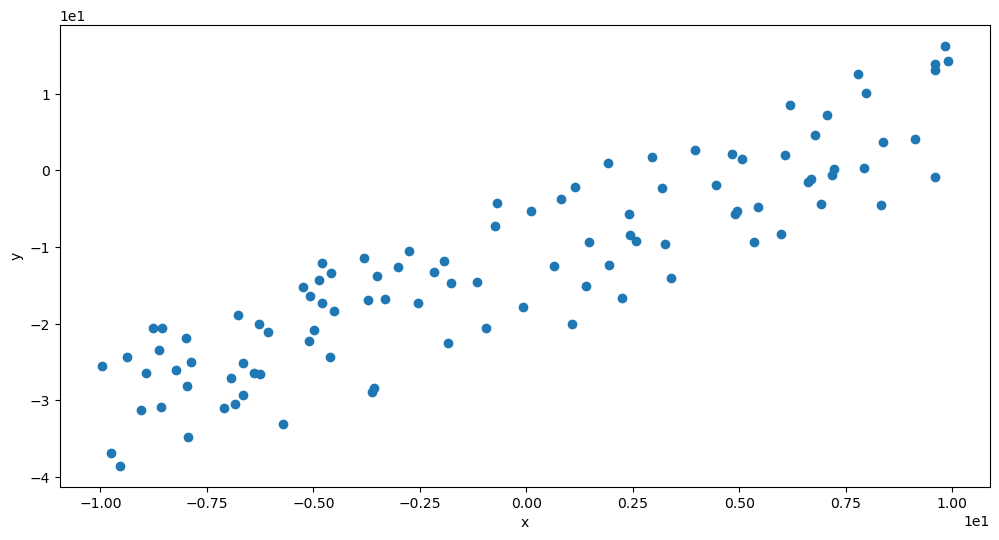

In [13]:
w, b = generate_w_b(w_limit=5, b_limit=15)
x_train, y_train = generate_X_y((100, ), w, b, 10, 10)
plt_linear(x_train, y_train)
plt.show()

In [14]:
w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost   109.85
Iteration  1000: Cost    15.67
Iteration  2000: Cost    15.67
Iteration  3000: Cost    15.67
Iteration  4000: Cost    15.67
Iteration  5000: Cost    15.67
Iteration  6000: Cost    15.67
Iteration  7000: Cost    15.67
Iteration  8000: Cost    15.67
Iteration  9000: Cost    15.67
(w,b) found by gradient descent: (  1.9188,-11.2970)


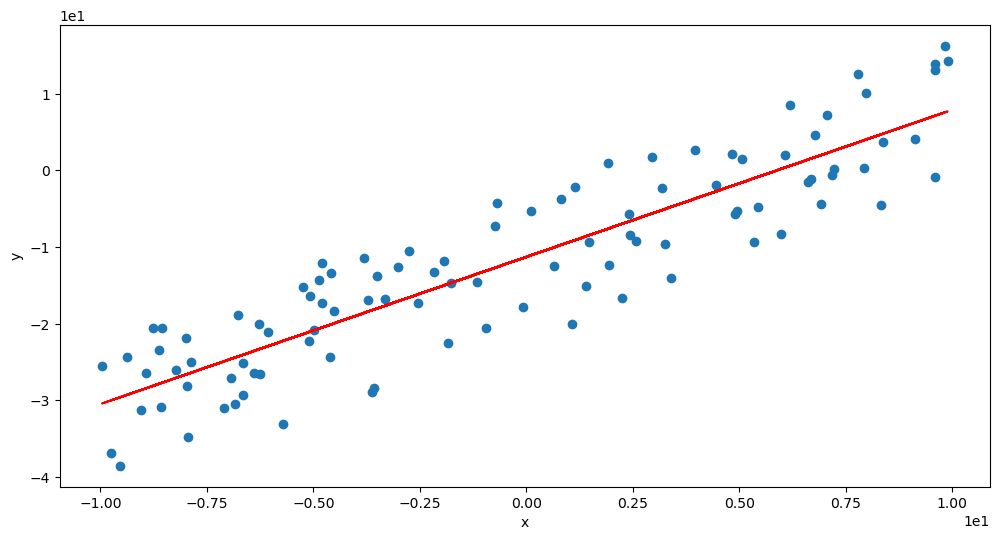

In [15]:
y_pred = w_final * x_train + b_final
plt_linear(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.show()

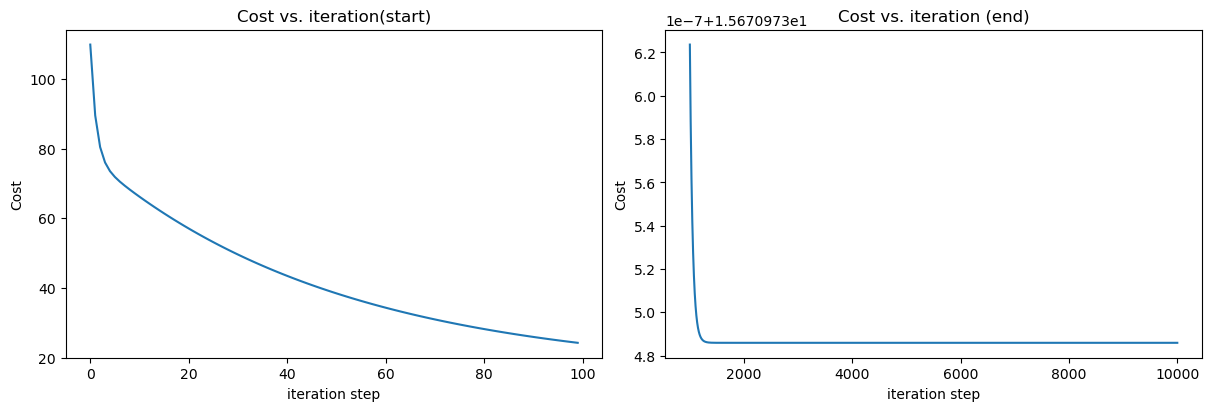

In [16]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [17]:
print(f"Actual w: {w:0.2f}, \tPredicted w: {w_final:0.2f}")
print(f"Actual b: {b:0.2f}, \tPredicted b: {b_final:0.2f}")
y_pred = w_final * x_train + b_final
mse_ = mse(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mae(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual w: 1.91, 	Predicted w: 1.92
Actual b: -12.29, 	Predicted b: -11.30
Mean squared error: 31.34
Mean absolute error: 4.85


# Univariate Linear Regression from scratch with ordinary least squares method

In [18]:
class SimpleLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), np.mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [19]:
linear_model = SimpleLinearRegression()
linear_model.fit(x_train, y_train)
w_linear = linear_model.coeffs()[0]
b_linear = linear_model.coeffs()[1]
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse_ = np.sum((np.dot(x_train, w_linear) + b_linear - y_train) ** 2) / len(y_train)
print(f"Mean squared error: {mse_:0.2f}")
mae = np.sum(np.abs(np.dot(x_train, w_linear) + b_linear - y_train)) / len(y_train)
print(f"Mean absolute error: {mae:0.2f}")

Actual w: 1.91,  	Predicted w: 1.92
Actual b: -12.29,  	Predicted b: -11.30
Mean squared error: 31.34
Mean absolute error: 4.85


# Univariate Linear Regression with Sklearn

In [20]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w_linear = linear_model.coef_[0]
b_linear = linear_model.intercept_
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse_ = mean_squared_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean absolute error: {mae_:0.2f}")

Actual w: 1.91,  	Predicted w: 1.92
Actual b: -12.29,  	Predicted b: -11.30
Mean squared error: 31.34
Mean absolute error: 4.85


In [22]:
linear_model = SGDRegressor(alpha=1.0e-2, max_iter=10000)
linear_model.fit(x_train.reshape(-1, 1), y_train)
w_linear = linear_model.coef_[0]
b_linear = linear_model.intercept_[0]
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse_ = mean_squared_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean absolute error: {mae_:0.2f}")

Actual w: 1.91,  	Predicted w: 1.83
Actual b: -12.29,  	Predicted b: -11.06
Mean squared error: 31.69
Mean absolute error: 4.82
